# Numerical Exercise 12

In [26]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import activations
from tensorflow.keras import backend as K

seed = 0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)



## Assigment
### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **you should complete**:    
```python
    #THIS IS INCOMPLETE ... COMPLETE BEFORE EXECUTING IT

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model
```

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.


In [27]:
img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) 
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape) 
print('Y_test shape:', Y_test.shape)


if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('Before to_categorical: ')
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('Train samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)
Before to_categorical: 
X_train shape:  (60000, 28, 28, 1)
Y_train shape:  (60000,)
Train samples:  60000
Test samples:  10000
After to_categorical: 
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


## Exercise 12.2
Change the architecture of your DNN using convolutional layers. Use Conv2D, MaxPooling2D, Dropout, but also do not forget Flatten, a standard Dense layer and soft-max in the end. I have merged step 2 and 3 in the following definition of create_CNN() that you should complete:

## Resolution
We will use 

In [28]:
def create_DNN():
    model = Sequential()
    # 10 filters as we have 10 digits
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, 5, activation='relu'))
    model.add(Conv2D(64, 5, activation='relu'))
    model.add(Conv2D(32, 5, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(optimizer='sgd'):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['acc'])
    return model


In [29]:
# training parameters
batch_size = 32
epochs = 8


In [30]:
# create the convolutional deep neural net
model = compile_model('sgd')

# train CDNN and store training info in history
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                            verbose=1, validation_data=(X_test, Y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.7306 - loss: 0.8111 - val_acc: 0.9716 - val_loss: 0.1860
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9662 - loss: 0.1142 - val_acc: 0.9790 - val_loss: 0.1149
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9757 - loss: 0.0836 - val_acc: 0.9828 - val_loss: 0.0953
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9807 - loss: 0.0681 - val_acc: 0.9847 - val_loss: 0.0891
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9829 - loss: 0.0574 - val_acc: 0.9874 - val_loss: 0.0723
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9848 - loss: 0.0506 - val_acc: 0.9870 - val_loss: 0.0666
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9858 - loss: 0.0467 - val_acc: 0.9869 - val_loss: 0.0650
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9873 - loss: 0.0421 - val_acc: 0.9893 - val_loss: 0.0496


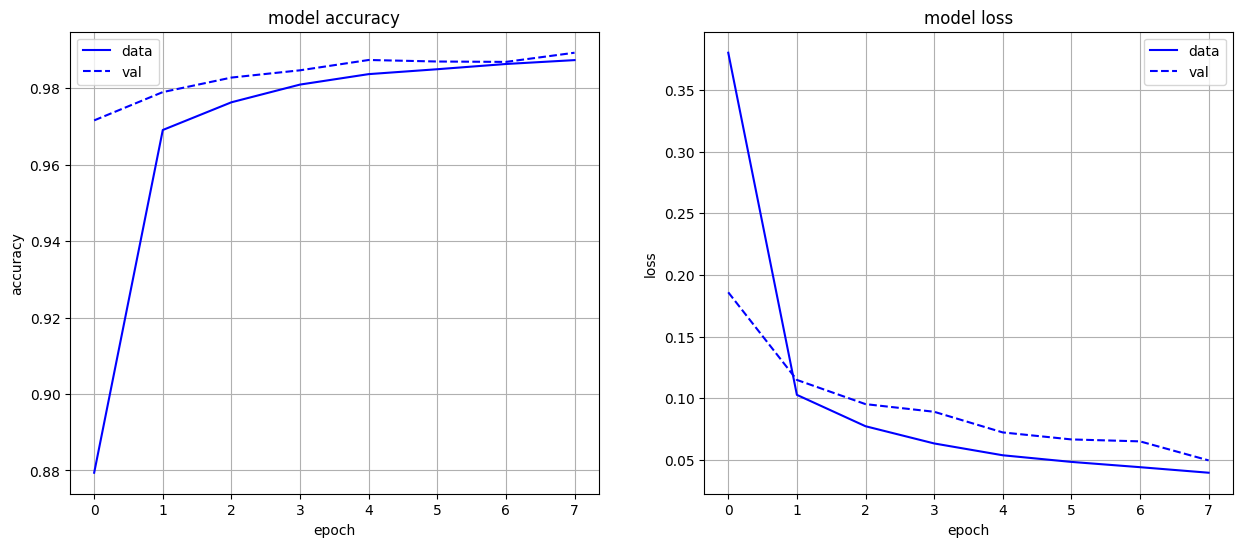

In [31]:
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
# summarize history for accuracy
plt.plot(history.history['acc'], label='data', color='blue')
plt.plot(history.history['val_acc'], label='val', color='blue', linestyle='--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 2, 2)
# summarize history for loss
plt.plot(history.history['loss'], label='data', color='blue')
plt.plot(history.history['val_loss'], label='val', color='blue', linestyle='--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid(True)
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


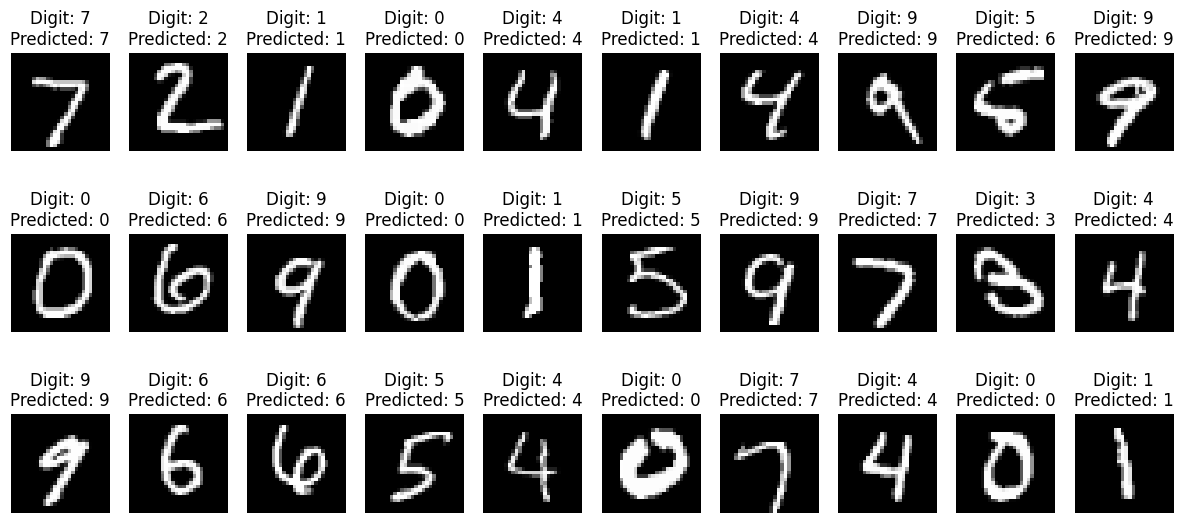

In [32]:
# plot some predictions

predictions = model.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (15,6))
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.show()


### Exercise 12.3


(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


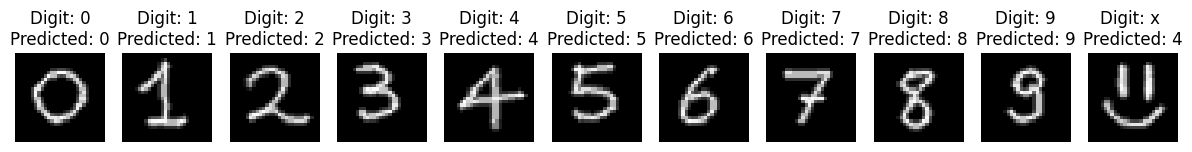

In [33]:
from PIL import Image
import os

digit_filename = "./ex12/{digit}.png"
digits = []
for i in range(10):
    digit_in = Image.open(digit_filename.format(digit=i)).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    img = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            img[k,j]=pix[j,k]
    img /= 255
    digits.append(img)


digit_in = Image.open(digit_filename.format(digit="smile")).convert('L')
ydim, xdim = digit_in.size
pix=digit_in.load();
img = np.zeros((xdim, ydim))
for j in range(ydim):
    for k in range(xdim):
        img[k,j]=pix[j,k]
img /= 255
digits.append(img)

print(img.shape)

for i in range(0, 11):
    digits[i] = digits[i].reshape(1, xdim, ydim, 1)
    predictions[i] = model.predict(digits[i])
    digits[i] = digits[i].reshape(xdim,ydim)

plt.figure(figsize = (15, 4))
for i in range(11):    
    ax = plt.subplot(1, 11, i + 1)    
    plt.imshow(digits[i], cmap = 'gray')
    if i != 10:
        plt.title("Digit: "+ str(i) + "\nPredicted: {}".format(np.argmax(predictions[i])))
    else:
        plt.title("Digit: x \nPredicted: {}".format(np.argmax(predictions[i])))
    plt.axis('off') 

## Some observations
Between sgd and adagrad optimizer, the first one is better for this kind of problem. Even if the accuracy is similar (both are at ~0.95), at the practical level, the sgd optimizer does recognize my handwritten digits better than the adagrad optimizer.

It is nice to see that the model tries to put my handdrawn smile in the class 4, probably because it recognize the vertical lines as the main features of the number 4 (see above the images used for the test).